```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [ ]:
#gpu
!pip install diffusers transformers safetensors accelerate

In [ ]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import matplotlib.pyplot as plt
import torch

# Diagram

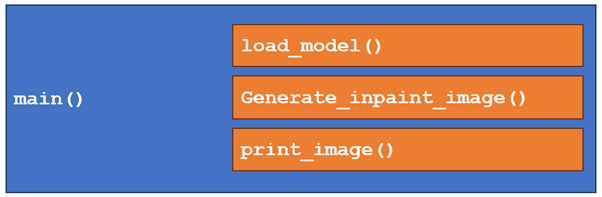

# Code

In [ ]:
def load_model(pretrained_model_or_path, torch_dtype=torch.float16, device="cuda"):
    pipeline = AutoPipelineForInpainting.from_pretrained(
        pretrained_model_or_path=pretrained_model_or_path,
        torch_dtype=torch_dtype,
        use_safetensors=True
    ).to(device)
    return pipeline

In [ ]:
def generate_inpaint_image(pipeline, prompt, init_image, mask_image, num_inference_steps):
    generated_image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, num_inference_steps=num_inference_steps).images[0]
    return generated_image

In [ ]:
def print_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
def main():
    pretrained_model_or_path = "stabilityai/stable-diffusion-xl-base-1.0"
    prompt = "Mickey Mouse sitting on a bench"
    num_inference_steps = 75
    image_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
    mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

    init_image = load_image(image_url).convert("RGB")
    mask_image = load_image(mask_url).convert("RGB")

    pipeline = load_model(pretrained_model_or_path)
    generated_image = generate_inpaint_image(pipeline, prompt, init_image, mask_image, num_inference_steps)
    print_image(generated_image)

# Execution

In [ ]:
main()